# Introduction
In this experiment we would fit two functions, $e^x$ and cos(cos(x)) using fourier series.
We would make use of functions of external librariers such as scipy and pylab to perform
various tasks of the experiment.

The fourier series of any function can be represented as follows:

\begin{equation}
    a_{0} + \sum\limits_{n=1}^{\infty} {{a_{n}\cos(nx_{i})+b_{n}\sin(nx_{i})}} \approx f(x_{i})              - (1)
    \end{equation}
The equations which are used to find the Fourier coefficients are as follows:
    \begin{equation}
         a_{0} = \frac{1}{2\pi}\int\limits_{0}^{2\pi} f(x)dx                                                 - (2)
    \end{equation}
    \begin{equation}
         a_{n} = \frac{1}{\pi}\int\limits_{0}^{2\pi} f(x)\cos(nx)dx                                          - (3)
    \end{equation}
    \begin{equation}
         b_{n} = \frac{1}{\pi}\int\limits_{0}^{2\pi} f(x)\sin(nx)dx                                          - (4)
    \end{equation}

# Procedure

In [1]:
import numpy as np
from pylab import *
import scipy.integrate as integrate
import warnings
warnings.filterwarnings('ignore')

## Part - 1
- Wrote python functions to realise the functions $e^x$ and cos(cos(x)), which takes vector values.
- Plotted those functions over the interval ${[}−2\pi,4\pi).$
- $e^x$ is not periodic while cos(cos(x)) is periodic, however fourier series of both functions is periodic with period $2\pi$.


In [2]:
def f1(x):
    return exp(x)
def f2(x):
    return cos(np.cos(x))

In [3]:
x = linspace(-2*pi,4*pi,500)
p = 2*pi

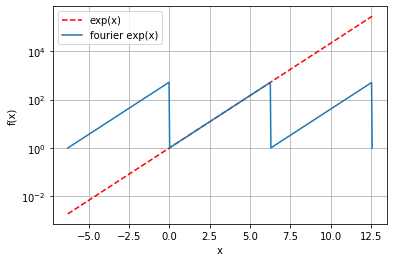

In [4]:
semilogy(x,f1(x),'--r',label='exp(x)')
semilogy(x,f1(x%p),label='fourier exp(x)')
xlabel('x')
ylabel('f(x)')
legend()
grid()
show()

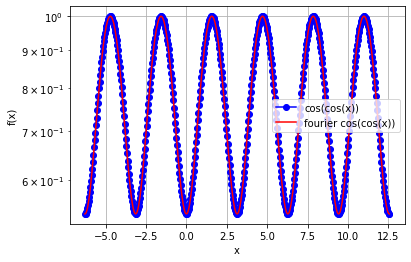

In [5]:
semilogy(x,f2(x),'-bo',label='cos(cos(x))')
semilogy(x,f2(x%p),'r',label='fourier cos(cos(x))')
xlabel('x')
ylabel('f(x)')
legend()
grid()
show()

## Part - 2
- Obtained the first 51 coefficients of fourier series for both the functions using scipy's quad function.

In [6]:
def an_f1(n):
    return (1/pi)*integrate.quad(lambda x: (f1(x))*(cos(n*x)),0,2*pi)[0]
def bn_f1(n):
    return (1/pi)*integrate.quad(lambda x: (f1(x))*(sin(n*x)),0,2*pi)[0]

In [7]:
def an_f2(n):
    return (1/pi)*integrate.quad(lambda x: (f2(x))*(cos(n*x)),0,2*pi)[0]
def bn_f2(n):
    return (1/pi)*integrate.quad(lambda x: (f2(x))*(sin(n*x)),0,2*pi)[0]

In [8]:
af1 = []
bf1 = []
f1_vec = [an_f1(0)/2]
for i in range(1,51):
    af1.append(abs(an_f1(i)))
    bf1.append(abs(bn_f1(i)))
    f1_vec.append(an_f1(i))
    f1_vec.append(bn_f1(i))

In [9]:
af2 = []
bf2 = []
f2_vec = [an_f2(0)/2]
for i in range(1,51):
    af2.append(abs(an_f2(i)))
    bf2.append(abs(bn_f2(i)))
    f2_vec.append(an_f2(i))
    f2_vec.append(bn_f2(i))

## Part - 3
- The fourier series coefficients vs n of both the functions is plotted in both semilog and log-log graphs.
- As $\cos(\cos(x))$ is an even function and for finding $b_n$ we use Eq.(4) so the whole integral is integrated in     interval $[-\pi,\pi)$ , then the integrand is odd since $\sin(nx)$ is there. so the integral becomes zero analytically. Where as here we compute using quad function which uses numerical methods so $b_n$ is very small but not exactly zero.
- The rate of decay of fourier series coefficients is related to the function's differentiability. If the function is infinitely differentiable, then the coefficients decay faster.
- As the coefficients of $e^x$ varies as $n^k$ where as $\cos(\cos(x)$ varies exponentially with 'n' means $\alpha^n$ ,thats why loglog looks linear in first case and semilog in second case.

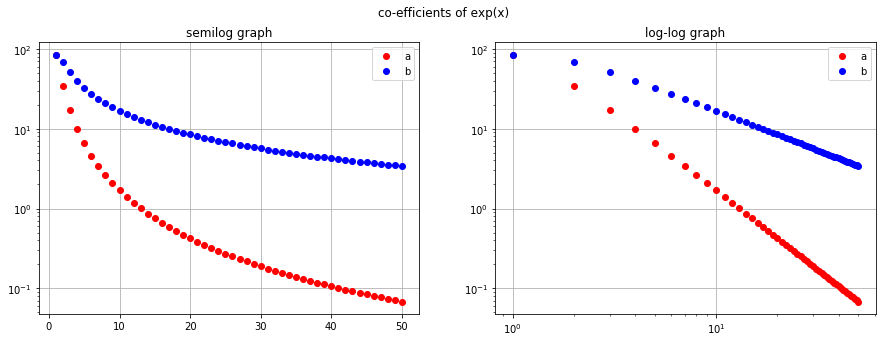

In [10]:
f = figure(figsize=(15,5))
f.suptitle('co-efficients of exp(x)')
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.semilogy(range(1,51),af1,'ro',label='a')
ax.semilogy(range(1,51),bf1,'bo',label='b')
ax2.loglog(range(1,51),af1,'ro',label='a')
ax2.loglog(range(1,51),bf1,'bo',label='b')
ax.title.set_text('semilog graph')
ax2.title.set_text('log-log graph')
ax.grid()
ax2.grid()
ax.legend()
ax2.legend()
show()

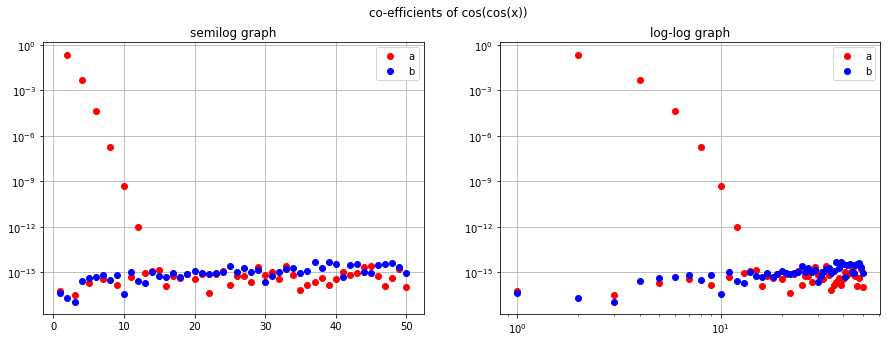

In [11]:
f = figure(figsize=(15,5))
f.suptitle('co-efficients of cos(cos(x))')
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.semilogy(range(1,51),af2,'ro',label='a')
ax.semilogy(range(1,51),bf2,'bo',label='b')
ax2.loglog(range(1,51),af2,'ro',label='a')
ax2.loglog(range(1,51),bf2,'bo',label='b')
ax.title.set_text('semilog graph')
ax2.title.set_text('log-log graph')
ax.grid()
ax2.grid()
ax.legend()
ax2.legend()
show()

## Part - 4&5
- In this part we have used least squares method to calculate the coeffients $a_n$ and $b_n$ of the fourier series.
- The fourier series is approximated to the terms containing first 51 coefficients.
- We have used matrices method and scipy function *lstsq* to predict the coefficients.

In [12]:
x=linspace(0,2*pi,401)
x=x[:-1]
b1=f1(x) # f has been written to take a vector
b2=f2(x)
A=zeros((400,51)) # allocate space for A
A[:,0]=1 # col 1 is all ones
for k in range(1,26):
    A[:,2*k-1]=cos(k*x) # cos(kx) column
    A[:,2*k]=sin(k*x) # sin(kx) column
#endfor
c1=lstsq(A,b1)[0]
c2=lstsq(A,b2)[0]# the ’[0]’ is to pull out the
# best fit vector. lstsq returns a list.

In [13]:
a0_f1_ls = c1[0]
an_f1_ls = []
bn_f1_ls = []
for i in range(1,len(c1)):
    if(i%2==1):
        an_f1_ls.append(abs(c1[i]))
    else:
        bn_f1_ls.append(abs(c1[i]))

In [14]:
a0_f2_ls = c2[0]
an_f2_ls = []
bn_f2_ls = []
for i in range(1,len(c2)):
    if(i%2==1):
        an_f2_ls.append(abs(c2[i]))
    else:
        bn_f2_ls.append(abs(c2[i]))

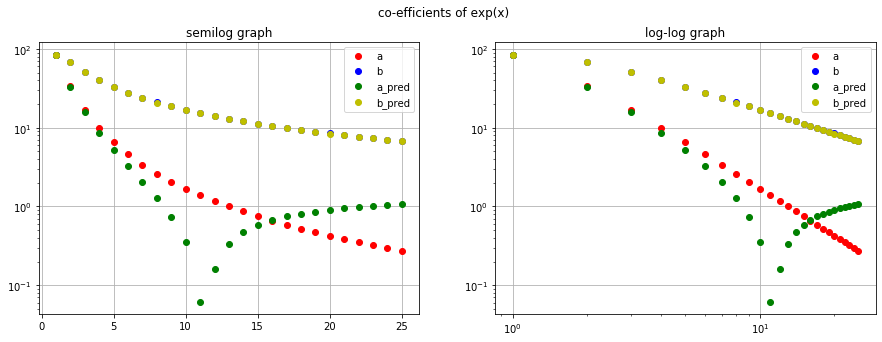

In [15]:
f = figure(figsize=(15,5))
f.suptitle('co-efficients of exp(x)')
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.semilogy(range(1,26),af1[:25],'ro',label='a')
ax.semilogy(range(1,26),bf1[:25],'bo',label='b')
ax.semilogy(range(1,26),an_f1_ls,'go',label='a_pred')
ax.semilogy(range(1,26),bn_f1_ls,'yo',label='b_pred')
ax2.loglog(range(1,26),af1[:25],'ro',label='a')
ax2.loglog(range(1,26),bf1[:25],'bo',label='b')
ax2.loglog(range(1,26),an_f1_ls,'go',label='a_pred')
ax2.loglog(range(1,26),bn_f1_ls,'yo',label='b_pred')
ax.title.set_text('semilog graph')
ax2.title.set_text('log-log graph')
ax.grid()
ax2.grid()
ax.legend()
ax2.legend()
show()

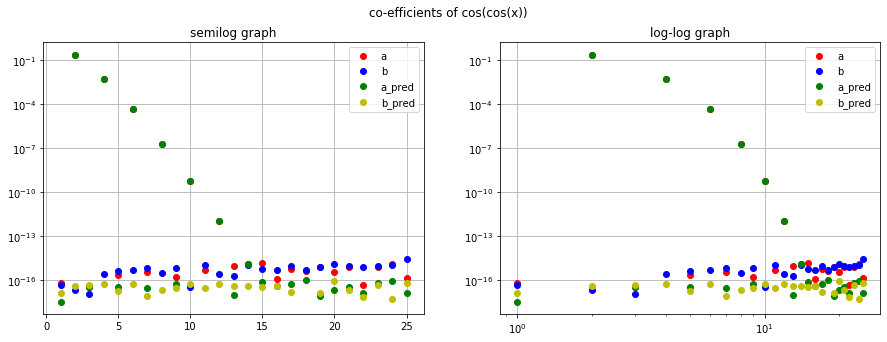

In [16]:
f = figure(figsize=(15,5))
f.suptitle('co-efficients of cos(cos(x))')
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.semilogy(range(1,26),af2[:25],'ro',label='a')
ax.semilogy(range(1,26),bf2[:25],'bo',label='b')
ax.semilogy(range(1,26),an_f2_ls,'go',label='a_pred')
ax.semilogy(range(1,26),bn_f2_ls,'yo',label='b_pred')
ax2.loglog(range(1,26),af2[:25],'ro',label='a')
ax2.loglog(range(1,26),bf2[:25],'bo',label='b')
ax2.loglog(range(1,26),an_f2_ls,'go',label='a_pred')
ax2.loglog(range(1,26),bn_f2_ls,'yo',label='b_pred')
ax.title.set_text('semilog graph')
ax2.title.set_text('log-log graph')
ax.grid()
ax2.grid()
ax.legend()
ax2.legend()
show()

## Part - 6
- In this part the deviation of the fourier coefficients predicted from *lstsq* function from the coefficients calculated from integration method is calculated and plotted.

In [17]:
dev_an_f1 = []
dev_bn_f1 = []
for i in range(25):
    dev_an_f1.append(abs(af1[i]-an_f1_ls[i]))
    dev_bn_f1.append(abs(bf1[i]-bn_f1_ls[i]))

dev_an_f2 = []
dev_bn_f2= []
for i in range(25):
    dev_an_f2.append(abs(af2[i]-an_f2_ls[i]))
    dev_bn_f2.append(abs(bf2[i]-bn_f2_ls[i]))

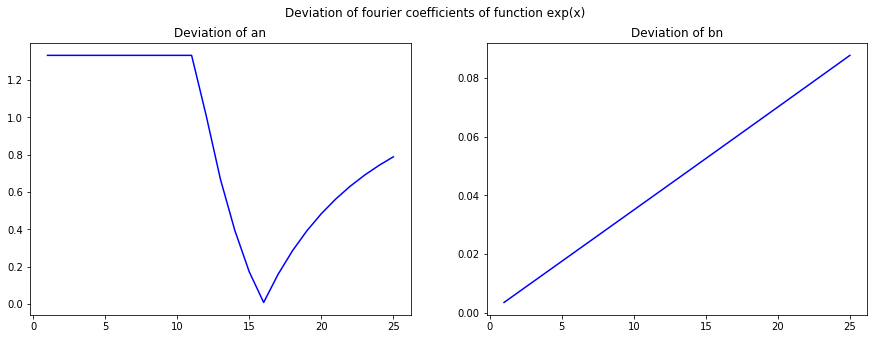

For the func. exp(x)
Max deviation of an = 1.332730870335439
Max deviation of bn = 0.08768050912536651


In [18]:
f = figure(figsize=(15,5))
f.suptitle('Deviation of fourier coefficients of function exp(x)')
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.plot(range(1,26),dev_an_f1,'-b')
ax2.plot(range(1,26),dev_bn_f1,'-b')
ax.title.set_text('Deviation of an')
ax2.title.set_text('Deviation of bn')
show()
print('For the func. exp(x)')
print('Max deviation of an = '+str(max(dev_an_f1)))
print('Max deviation of bn = '+str(max(dev_bn_f1)))

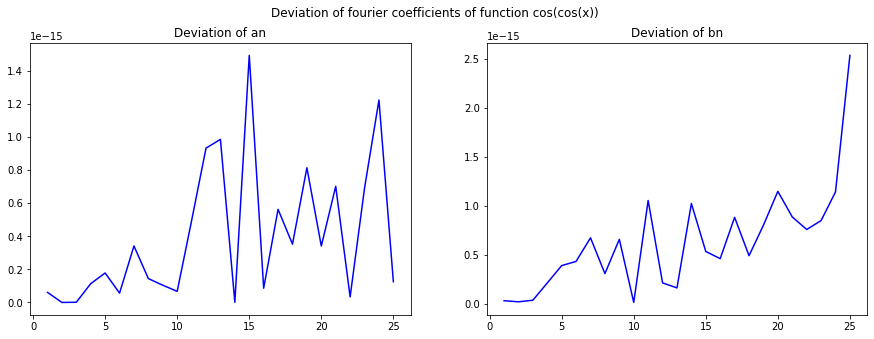

For the func. cos(cos(x))
Max deviation of an = 1.4945787626373895e-15
Max deviation of bn = 2.5358991573348873e-15


In [19]:
f = figure(figsize=(15,5))
f.suptitle('Deviation of fourier coefficients of function cos(cos(x))')
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.plot(range(1,26),dev_an_f2,'-b')
ax2.plot(range(1,26),dev_bn_f2,'-b')
ax.title.set_text('Deviation of an')
ax2.title.set_text('Deviation of bn')
show()
print('For the func. cos(cos(x))')
print('Max deviation of an = '+str(max(dev_an_f2)))
print('Max deviation of bn = '+str(max(dev_bn_f2)))

## Part - 7
- Here, in this part the functions are plotted using the fourier approximation(taking upto 51 coefficients) and compared with the original ones.
- We can see that there is a large deviation is the $e^x$ graph, while there is a very small deviation (close to zero), in the graph of $\cos(\cos(x))$.
- This is because, $e^x$ is an aperiodic function and we know that fourier series is always periodic. So, here we are trying to fit a signal of infinte period into a finite period, this will lead to loss in information and hence, the fourier approximation will not be that accurate. This problem is not encountered while fitting the function $\cos(\cos(x))$, as it is a periodic function.

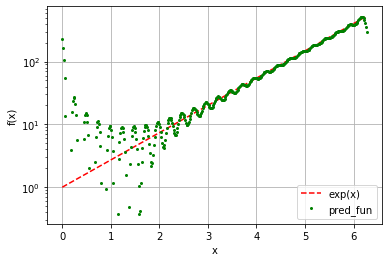

In [20]:
semilogy(x,f1(x),'--r',label='exp(x)')
semilogy(x,np.matmul(A,c1),'go',markersize=2,label='pred_fun')
xlabel('x')
ylabel('f(x)')
legend()
grid()
show()

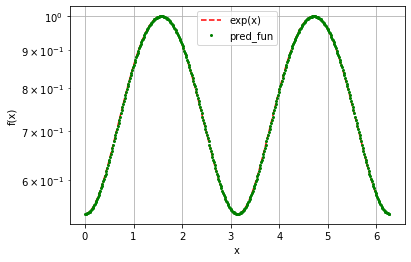

In [21]:
semilogy(x,f2(x),'--r',label='exp(x)')
semilogy(x,np.matmul(A,c2),'go',markersize=2,label='pred_fun')
xlabel('x')
ylabel('f(x)')
legend()
grid()
show()

# Conclusion
- From this experiment we can see that fourier series approximation works for functions which are periodic like $\cos(\cos(x))$.
- Fourier series approximation fails to work on functions which are aperiodic like $e^x$ (monotonic).
- The convergence rate of the fourier coefficients totally depends upon the differentialbility of the given function.